In [12]:
import pylidc as pl
import matplotlib.pyplot as plt

In [13]:
ann = pl.query(pl.Annotation).first()
print(ann.scan.patient_id)
# => LIDC-IDRI-0078

LIDC-IDRI-0078


In [14]:
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,
                                      pl.Annotation.malignancy == 5)
print(anns.count())
# => 91

91


In [15]:
ann = pl.query(pl.Annotation)\
        .filter(pl.Annotation.malignancy == 5).first()

print(ann.malignancy, ann.Malignancy)
# => 5, 'Highly Suspicious'

print(ann.margin, ann.Margin)
# => 2, 'Near Poorly Defined'

5 Highly Suspicious
2 Near Poorly Defined


In [16]:
ann.print_formatted_feature_table()
# => Feature              Meaning                    #
# => -                    -                          -
# => Subtlety           | Obvious                  | 5
# => Internalstructure  | Soft Tissue              | 1
# => Calcification      | Absent                   | 6
# => Sphericity         | Ovoid/Round              | 4
# => Margin             | Near Poorly Defined      | 2
# => Lobulation         | Near Marked Lobulation   | 4
# => Spiculation        | No Spiculation           | 1
# => Texture            | Solid                    | 5
# => Malignancy         | Highly Suspicious        | 5

Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid/Round              | 4 
Margin             | Near Poorly Defined      | 2 
Lobulation         | Near Marked Lobulation   | 4 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


In [27]:
svals = pl.query(pl.Annotation.spiculation).filter(pl.Annotation.spiculation > 3)

print(svals[0])
# => (4,)

print(all([s[0] > 3 for s in svals]))
# => True

(4,)
True


In [18]:
ann = pl.query(pl.Annotation).first()
contours = ann.contours

print(contours[0])
# => Contour(id=21,annotation_id=1)

Contour(id=1,annotation_id=1)


In [19]:
print("%.2f mm, %.2f mm^2, %.2f mm^3" % (ann.diameter,
                                         ann.surface_area,
                                         ann.volume))
# => 20.84 mm, 1242.74 mm^2, 2439.30 mm^

20.84 mm, 1124.13 mm^2, 2439.30 mm^3


In [20]:
mask = ann.boolean_mask()
print(mask.shape, mask.dtype)
# => (34, 27, 6), dtype('bool')

(34, 27, 6) bool


In [21]:
bbox = ann.bbox()
print(bbox)
# => (slice(151, 185, None), slice(349, 376, None), slice(44, 50, None))

vol = ann.scan.to_volume()
print(vol[bbox].shape)
# => (34, 27, 6)

(slice(151, 185, None), slice(349, 376, None), slice(44, 50, None))
Loading dicom files ... This may take a moment.
(34, 27, 6)


In [22]:
print(ann.bbox_dims())
# => [21.45, 16.90, 15.0]

[21.45 16.9  15.  ]


Loading dicom files ... This may take a moment.


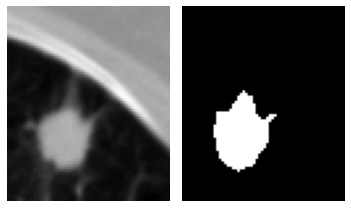

In [23]:
ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()

padding = [(30,10), (10,25), (0,0)]

mask = ann.boolean_mask(pad=padding)
bbox = ann.bbox(pad=padding)

fig,ax = plt.subplots(1,2,figsize=(5,3))

ax[0].imshow(vol[bbox][:,:,2], cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].imshow(mask[:,:,2], cmap=plt.cm.gray)
ax[1].axis('off')

plt.tight_layout()
#plt.savefig("../images/mask_bbox.png", bbox_inches="tight")
plt.show()

/home/masashi/py37/lib/python3.7/site-packages/pylidc/Annotation.py:752: FutureWarning: marching_cubes_lewiner is deprecated in favor of marching_cubes. marching_cubes_lewiner will be removed in version 0.19
  step_size=step)


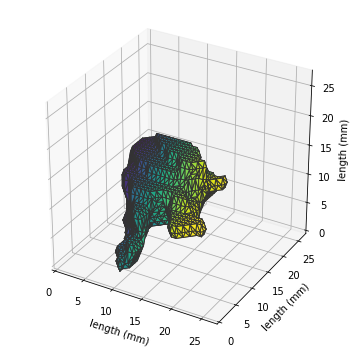

In [26]:
ann = pl.query(pl.Annotation).filter(pl.Annotation.lobulation == 5).first()
ann.visualize_in_3d()

Loading dicom files ... This may take a moment.


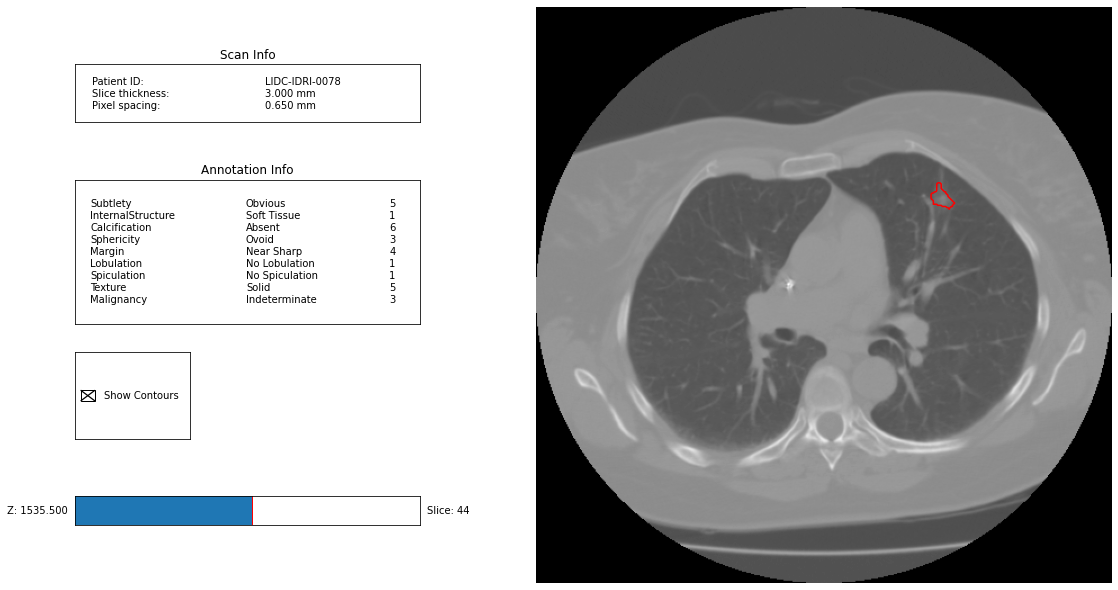

In [25]:
ann = pl.query(pl.Annotation).first()
ann.visualize_in_scan()